In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [2]:
states = pd.read_csv("statesyear_all.csv", index_col=0)

states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
8,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,684880.0,217.941053,262.158206,206.880030,258.777258
11,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,674679.0,223.344643,261.939022,207.083848,261.870872
13,2005_ALABAMA,ALABAMA,2005,729342.0,5889966.0,665924.0,3247562.0,1976480.0,5904664.0,3053380.0,...,55919.0,59643.0,43452.0,466164.0,212414.0,681201.0,225.071236,262.211100,207.752033,273.045757
15,2007_ALABAMA,ALABAMA,2007,743273.0,7069040.0,689072.0,4070949.0,2309019.0,7196459.0,3653466.0,...,57795.0,58792.0,46200.0,466414.0,216941.0,686947.0,228.520018,266.000110,216.388954,265.641982


In [3]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 4 to 1489
Data columns (total 25 columns):
PRIMARY_KEY                     439 non-null object
STATE                           439 non-null object
YEAR                            439 non-null int64
ENROLL                          439 non-null float64
TOTAL_REVENUE                   439 non-null float64
FEDERAL_REVENUE                 439 non-null float64
STATE_REVENUE                   439 non-null float64
LOCAL_REVENUE                   439 non-null float64
TOTAL_EXPENDITURE               439 non-null float64
INSTRUCTION_EXPENDITURE         439 non-null float64
SUPPORT_SERVICES_EXPENDITURE    439 non-null float64
OTHER_EXPENDITURE               439 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      439 non-null float64
GRADES_PK_G                     439 non-null float64
GRADES_KG_G                     439 non-null float64
GRADES_4_G                      439 non-null float64
GRADES_8_G                      439 non-null float

1. soru

In [4]:
states["winsorize_ENROLL"] = winsorize(states["ENROLL"],(0, 0.10))
states["winsorize_TOTAL_REVENUE"] = winsorize(states["TOTAL_REVENUE"], (0, 0.10))
states["winsorize_TOTAL_EXPENDITURE"] = winsorize(states["TOTAL_EXPENDITURE"], (0, 0.10))
states["winsorize_GRADES_4_G"] = winsorize(states["GRADES_4_G"], (0, 0.10))
states["winsorize_GRADES_8_G"] = winsorize(states["GRADES_8_G"], (0, 0.10))
states["winsorize_GRADES_ALL_G"] = winsorize(states["GRADES_ALL_G"], (0, 0.10))
states["winsorize_AVG_MATH_4_SCORE"] = winsorize(states["AVG_MATH_4_SCORE"], (0, 0.10))
states["winsorize_AVG_MATH_8_SCORE"] = winsorize(states["AVG_MATH_8_SCORE"], (0, 0.10))
states["winsorize_AVG_READING_4_SCORE"] = winsorize(states["AVG_READING_4_SCORE"], (0, 0.10))
states["winsorize_AVG_READING_8_SCORE"] = winsorize(states["AVG_READING_8_SCORE"], (0, 0.10))
states["winsorize_INSTRUCTION_EXPENDITURE"] = winsorize(states["INSTRUCTION_EXPENDITURE"], (0, 0.10))

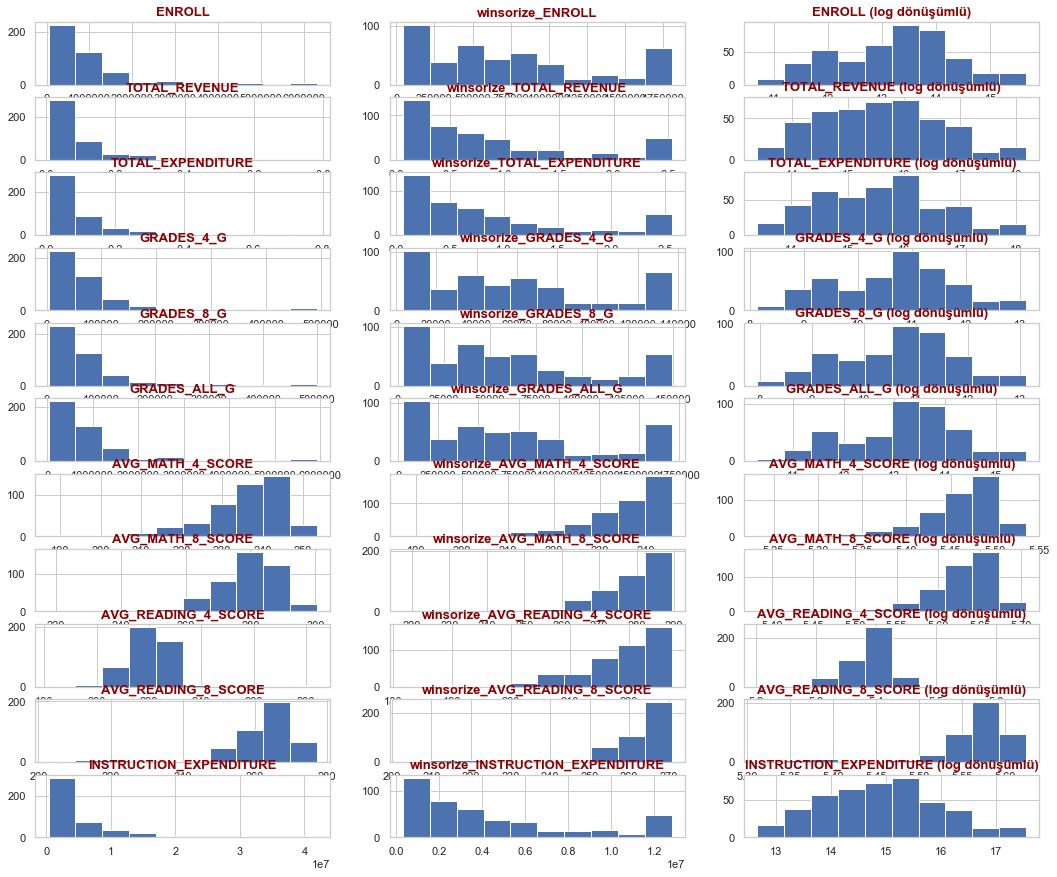

In [5]:
plt.figure(figsize=(18,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler = ['ENROLL', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE', 'GRADES_4_G', 'GRADES_8_G','GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE','INSTRUCTION_EXPENDITURE']
winsorize_degiskenler = ['winsorize_ENROLL', 'winsorize_TOTAL_REVENUE', 'winsorize_TOTAL_EXPENDITURE', 'winsorize_GRADES_4_G', 'winsorize_GRADES_8_G','winsorize_GRADES_ALL_G', 'winsorize_AVG_MATH_4_SCORE', 'winsorize_AVG_MATH_8_SCORE','winsorize_AVG_READING_4_SCORE','winsorize_AVG_READING_8_SCORE','winsorize_INSTRUCTION_EXPENDITURE']

for i in range(33):
    if (i%3==0):
        plt.subplot(11, 3, i+1)
        plt.hist(states[degiskenler[i//3]])
        plt.title(degiskenler[i//3], fontdict=baslik_font)
    elif (i%3==1):
        plt.subplot(11, 3, i+1)
        plt.hist(states[winsorize_degiskenler[i//3]])
        plt.title(winsorize_degiskenler[i//3], fontdict=baslik_font)
    elif (i%3==2):
        plt.subplot(11, 3, i+1)
        plt.hist(np.log(states[degiskenler[i//3]]))
        plt.title(degiskenler[i//3] + ' (log dönüşümlü)', fontdict=baslik_font)



2. soru

In [6]:
WYOMING_states=states[states['STATE']=='WYOMING']
WYOMING_states

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,winsorize_TOTAL_REVENUE,winsorize_TOTAL_EXPENDITURE,winsorize_GRADES_4_G,winsorize_GRADES_8_G,winsorize_GRADES_ALL_G,winsorize_AVG_MATH_4_SCORE,winsorize_AVG_MATH_8_SCORE,winsorize_AVG_READING_4_SCORE,winsorize_AVG_READING_8_SCORE,winsorize_INSTRUCTION_EXPENDITURE
1470,1996_WYOMING,WYOMING,1996,99859.0,664057.0,41007.0,339629.0,283421.0,676305.0,360100.0,...,664057.0,676305.0,7283.0,8270.0,31722.0,223.196003,274.778947,219.010780,254.523637,360100.0
1474,2000_WYOMING,WYOMING,2000,91883.0,787323.0,66085.0,408356.0,312882.0,769923.0,417424.0,...,787323.0,769923.0,6736.0,7284.0,29783.0,229.251923,276.689980,221.129754,221.129754,417424.0
1477,2003_WYOMING,WYOMING,2003,85966.0,962240.0,84308.0,489199.0,388733.0,915515.0,473447.0,...,962240.0,915515.0,6174.0,7173.0,81238.0,241.085701,283.503350,222.075166,258.108365,473447.0
1479,2005_WYOMING,WYOMING,2005,84146.0,1132160.0,106484.0,585789.0,439887.0,1033603.0,510498.0,...,1132160.0,1033603.0,6111.0,6819.0,78028.0,242.955914,282.100610,223.262146,258.191598,510498.0
1481,2007_WYOMING,WYOMING,2007,85034.0,1477891.0,111051.0,722364.0,644476.0,1390344.0,661713.0,...,1477891.0,1390344.0,6493.0,6711.0,79531.0,243.866915,286.987771,225.289483,262.228025,661713.0
1483,2009_WYOMING,WYOMING,2009,86971.0,1675761.0,108333.0,945765.0,621663.0,1658156.0,744877.0,...,1675761.0,1658156.0,6683.0,6606.0,80749.0,242.009196,286.104034,222.652196,270.734453,744877.0
1485,2011_WYOMING,WYOMING,2011,88165.0,1650621.0,154955.0,878979.0,616687.0,1656850.0,825783.0,...,1650621.0,1656850.0,6790.0,6796.0,82226.0,243.874435,287.767926,224.062278,267.272891,825783.0
1487,2013_WYOMING,WYOMING,2013,91533.0,1695967.0,113501.0,881114.0,701352.0,1675477.0,846872.0,...,1695967.0,1675477.0,7086.0,6867.0,84591.0,245.549797,288.119137,225.848975,270.734453,846872.0
1489,2015_WYOMING,WYOMING,2015,93867.0,1962874.0,120290.0,1116917.0,725667.0,1942406.0,895910.0,...,1962874.0,1942406.0,7551.0,6902.0,86876.0,245.549797,286.666547,227.236463,260.185273,895910.0


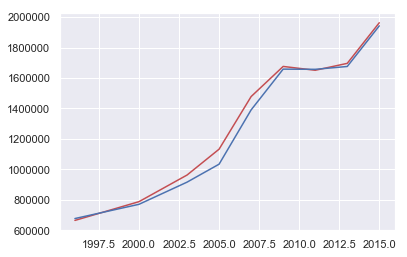

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import math
import seaborn as sns
sns.set()
y1 = WYOMING_states['TOTAL_REVENUE']
y2 = WYOMING_states['TOTAL_EXPENDITURE']
x = WYOMING_states['YEAR']
plot(x,y1,"r",x,y2,"b")


3. soru

In [8]:
WYOMING_states[['YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1470,1996,223.196003,274.778947,219.010780,254.523637
1474,2000,229.251923,276.689980,221.129754,221.129754
1477,2003,241.085701,283.503350,222.075166,258.108365
1479,2005,242.955914,282.100610,223.262146,258.191598
1481,2007,243.866915,286.987771,225.289483,262.228025
1483,2009,242.009196,286.104034,222.652196,272.305134
1485,2011,243.874435,287.767926,224.062278,267.272891
1487,2013,246.522401,288.119137,225.848975,272.036124
1489,2015,246.759764,286.666547,228.160803,260.185273


In [9]:
WYOMING_states[['YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].describe()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2006.555556,239.946917,283.635367,223.499065,258.442311
std,6.207075,8.139591,4.908547,2.723413,15.330018
min,1996.000000,223.196003,274.778947,219.010780,221.129754
25%,2003.000000,241.085701,282.100610,222.075166,258.108365
50%,2007.000000,242.955914,286.104034,223.262146,260.185273
75%,2011.000000,243.874435,286.987771,225.289483,267.272891
max,2015.000000,246.759764,288.119137,228.160803,272.305134


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

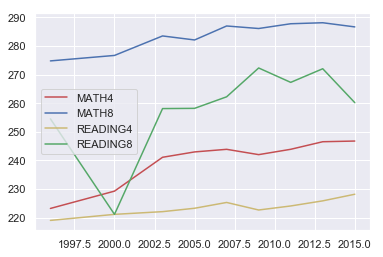

In [10]:
y1 = WYOMING_states['AVG_MATH_4_SCORE']
y2 = WYOMING_states['AVG_MATH_8_SCORE']
y3 = WYOMING_states['AVG_READING_4_SCORE']
y4 = WYOMING_states['AVG_READING_8_SCORE']
x = WYOMING_states['YEAR']
plot(x,y1,"r",x,y2,"b",x,y3,"y",x,y4,"g")
legend([u"MATH4",u"MATH8",u"READING4",u"READING8"])
plot

4. sınıf ve 8. sınıf için bakınca (hem ortalamalardan hem de grafikten)Matematik te Reading e göre başarılı oldukları gözükmektedir.

4. soru

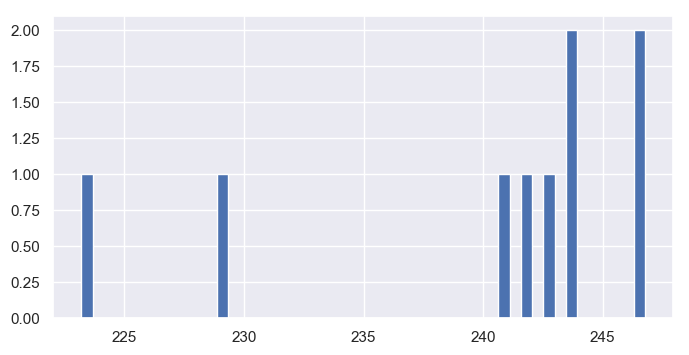

In [11]:

plt.figure(figsize=(8,4), dpi = 100)
plt.hist(WYOMING_states['AVG_MATH_4_SCORE'], bins = 50)
plt.show()

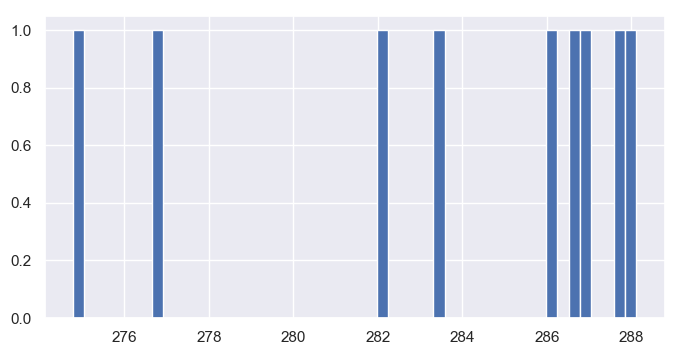

In [12]:
plt.figure(figsize=(8,4), dpi = 100)
plt.hist(WYOMING_states['AVG_MATH_8_SCORE'], bins = 50)
plt.show()

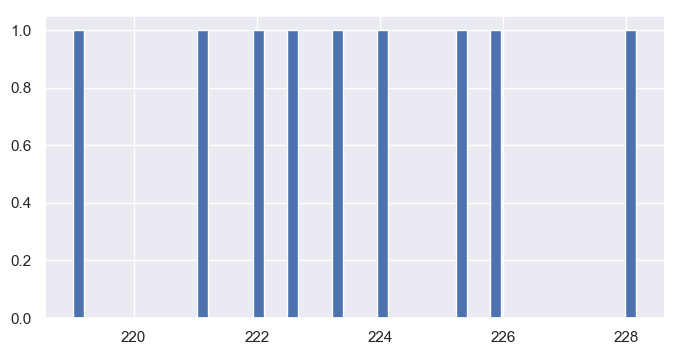

In [13]:
plt.figure(figsize=(8,4), dpi = 100)
plt.hist(WYOMING_states['AVG_READING_4_SCORE'], bins = 50)
plt.show()

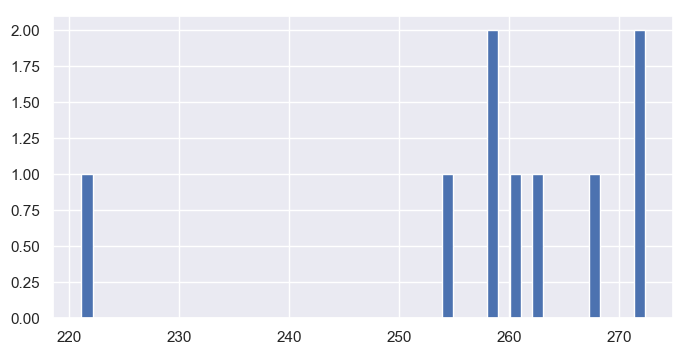

In [14]:
plt.figure(figsize=(8,4), dpi = 100)
plt.hist(WYOMING_states['AVG_READING_8_SCORE'], bins = 50)
plt.show()

5. soru

WYOMING_states2---->Median a göre 

WYOMING_states3---->Mean e göra

In [15]:
states2 = pd.read_csv("states_all.csv", index_col=0)
WYOMING_states2=states2[states2['STATE']=='WYOMING']
states3 = pd.read_csv("states_all.csv", index_col=0)
WYOMING_states3=states3[states3['STATE']=='WYOMING']

In [16]:
WYOMING_states2_MATH4 = WYOMING_states2['AVG_MATH_4_SCORE']
for i in range(0, len(WYOMING_states2_MATH4)):
    if pd.isnull(WYOMING_states2_MATH4[i]):
        WYOMING_states2_MATH4[i] = WYOMING_states2_MATH4.median()
print(WYOMING_states2)
WYOMING_states2_MATH8 = WYOMING_states2['AVG_MATH_8_SCORE']
for i in range(0, len(WYOMING_states2_MATH8)):
    if pd.isnull(WYOMING_states2_MATH8[i]):
        WYOMING_states2_MATH8[i] = WYOMING_states2_MATH8.median()
        
WYOMING_states2_READING4 = WYOMING_states2['AVG_READING_4_SCORE']
for i in range(0, len(WYOMING_states2_READING4)):
    if pd.isnull(WYOMING_states2_READING4[i]):
        WYOMING_states2_READING4[i] = WYOMING_states2_READING4.median()
        
WYOMING_states2_READING8 = WYOMING_states2['AVG_READING_8_SCORE']
for i in range(0, len(WYOMING_states2_READING8)):
    if pd.isnull(WYOMING_states2_READING8[i]):
        WYOMING_states2_READING8[i] = WYOMING_states2_READING8.median()


                STATE  YEAR    ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
PRIMARY_KEY                                                             
1992_WYOMING  WYOMING  1992       NaN       629748.0          31714.0   
1993_WYOMING  WYOMING  1993  100313.0       615130.0          35437.0   
1994_WYOMING  WYOMING  1994  100899.0       674921.0          38849.0   
1995_WYOMING  WYOMING  1995  100314.0       634237.0          42456.0   
1996_WYOMING  WYOMING  1996   99859.0       664057.0          41007.0   
1997_WYOMING  WYOMING  1997   98777.0       660079.0          43171.0   
1998_WYOMING  WYOMING  1998   96504.0       703280.0          47201.0   
1999_WYOMING  WYOMING  1999   94420.0       780875.0          57983.0   
2000_WYOMING  WYOMING  2000   91883.0       787323.0          66085.0   
2001_WYOMING  WYOMING  2001   89711.0       804297.0          69172.0   
2002_WYOMING  WYOMING  2002   87897.0       908719.0          75498.0   
2003_WYOMING  WYOMING  2003   85966.0       962240.

In [17]:
WYOMING_states3_MATH4 = WYOMING_states3['AVG_MATH_4_SCORE']
for i in range(0, len(WYOMING_states3_MATH4)):
    if pd.isnull(WYOMING_states3_MATH4[i]):
        WYOMING_states3_MATH4[i] = WYOMING_states3_MATH4.mean()
WYOMING_states3_MATH8 = WYOMING_states3['AVG_MATH_8_SCORE']
for i in range(0, len(WYOMING_states3_MATH8)):
    if pd.isnull(WYOMING_states3_MATH8[i]):
        WYOMING_states3_MATH8[i] = WYOMING_states3_MATH8.mean()
        
WYOMING_states3_READING4 = WYOMING_states3['AVG_READING_4_SCORE']
for i in range(0, len(WYOMING_states3_READING4)):
    if pd.isnull(WYOMING_states3_READING4[i]):
        WYOMING_states3_READING4[i] = WYOMING_states3_READING4.mean()
        
WYOMING_states3_READING8 = WYOMING_states3['AVG_READING_8_SCORE']
for i in range(0, len(WYOMING_states3_READING8)):
    if pd.isnull(WYOMING_states3_READING8[i]):
        WYOMING_states3_READING8[i] = WYOMING_states3_READING8.mean()

In [18]:
states4pad = pd.read_csv("statesinterpolate_pad_all.csv", index_col=0)

In [19]:
WYOMING_statespad=states4pad[states4pad['STATE']=='WYOMING']

WYOMING_statespad enterpolasyon pad yontemine göre

In [20]:
states4lin = pd.read_csv("statesinterpolate_linear_all.csv", index_col=0)

WYOMING_stateslin enterpolasyon linear yontemine göre

In [21]:
WYOMING_stateslin=states4lin[states4lin['STATE']=='WYOMING']

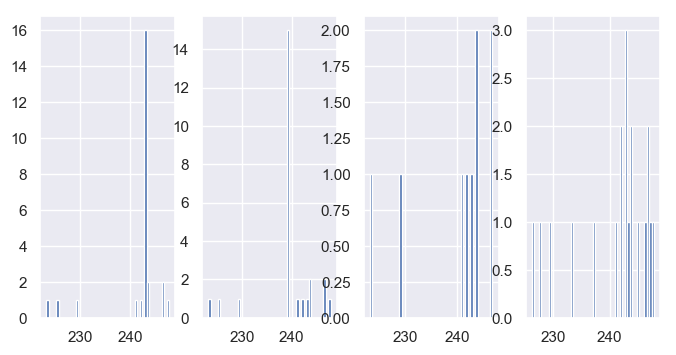

In [24]:
plt.figure(figsize=(8,4), dpi = 100)
plt.subplot(1, 4, 1)
plt.hist(WYOMING_states2['AVG_MATH_4_SCORE'], bins = 50)

plt.subplot(1, 4, 2)
plt.hist(WYOMING_states3['AVG_MATH_4_SCORE'], bins = 50)

plt.subplot(1, 4, 3)
plt.hist(WYOMING_statespad['AVG_MATH_4_SCORE'], bins = 50)

plt.subplot(1, 4, 4)
plt.hist(WYOMING_stateslin['AVG_MATH_4_SCORE'], bins = 50)
plt.show()


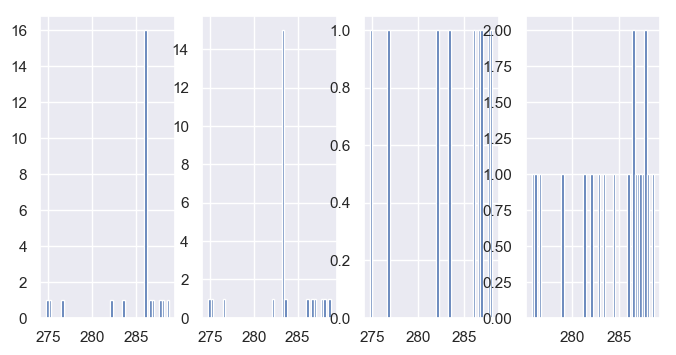

In [25]:
plt.figure(figsize=(8,4), dpi = 100)
plt.subplot(1, 4, 1)
plt.hist(WYOMING_states2['AVG_MATH_8_SCORE'], bins = 50)

plt.subplot(1, 4, 2)
plt.hist(WYOMING_states3['AVG_MATH_8_SCORE'], bins = 50)

plt.subplot(1, 4, 3)
plt.hist(WYOMING_statespad['AVG_MATH_8_SCORE'], bins = 50)

plt.subplot(1, 4, 4)
plt.hist(WYOMING_stateslin['AVG_MATH_8_SCORE'], bins = 50)
plt.show()

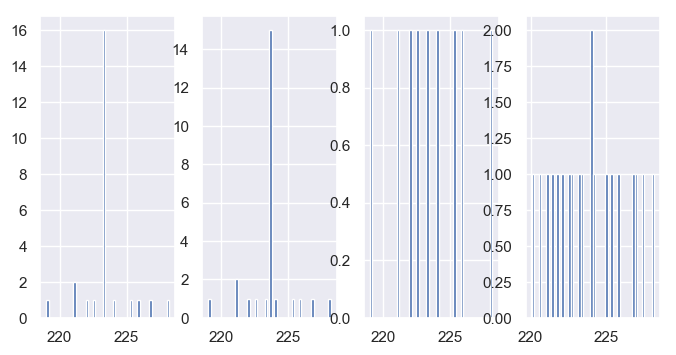

In [26]:
plt.figure(figsize=(8,4), dpi = 100)
plt.subplot(1, 4, 1)
plt.hist(WYOMING_states2['AVG_READING_4_SCORE'], bins = 50)

plt.subplot(1, 4, 2)
plt.hist(WYOMING_states3['AVG_READING_4_SCORE'], bins = 50)

plt.subplot(1, 4, 3)
plt.hist(WYOMING_statespad['AVG_READING_4_SCORE'], bins = 50)

plt.subplot(1, 4, 4)
plt.hist(WYOMING_stateslin['AVG_READING_4_SCORE'], bins = 50)
plt.show()

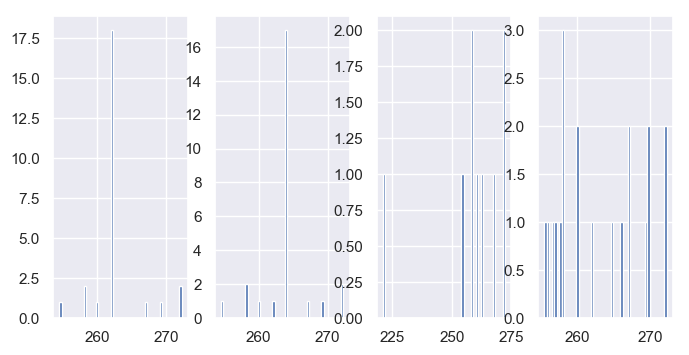

In [27]:
plt.figure(figsize=(8,4), dpi = 100)
plt.subplot(1, 4, 1)
plt.hist(WYOMING_states2['AVG_READING_8_SCORE'], bins = 50)

plt.subplot(1, 4, 2)
plt.hist(WYOMING_states3['AVG_READING_8_SCORE'], bins = 50)

plt.subplot(1, 4, 3)
plt.hist(WYOMING_statespad['AVG_READING_8_SCORE'], bins = 50)

plt.subplot(1, 4, 4)
plt.hist(WYOMING_stateslin['AVG_READING_8_SCORE'], bins = 50)
plt.show()